#MINIPROYECTO CLASIFICACION

JHON JAIRO CASTILLO CIFUENTES

2167742



*INTRODUCCION*

Una de las grandes aplicaciones de machine learning es la clasificacion de datos, con esta se puede automatizar procesos de seleccion a partir de diferentes caracteristicas de in cojunto de datos y seleccionarlas en diferentes grupos a traves de etiquetas.

En este miniproyecto se realizará la clasificacion de 4 clases de vehiculos dependiendo diferentes caracteristicas, esto a traves de 3 métodos de clasificación de machine learning, se evaluara a partir de matrices de matrices de confusión y de curvas ROC.


*DESARROLLO*

El primer paso es llamar las librerias necesarias para el proyecto.


In [10]:
 from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

##DEFINIR EL DATASET

El dataset a trabajar en este proyecto se llama car evaluation dataset, en el se evaluan diferentes autos dependiendo de seis variables de entrada que son "compra", "mantenimiento", "puertas", "personas", "maletero", "seguridad" donde cada uno de estos atributos varian para cada auto, dependiendo de la combinacion de estos se obtiene la salida "clase" que clasifica a los coches en cuatro grandes tipos inaccecible "unacc", accesible "acc", bueno "good" y muy bueno "vgood".

Primero se lee el dataset a partir de una URL y podemos comprobar que esta compuesto de 1727 filas y 7 columnas.

In [11]:
car = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",header=None,sep=',')
car.columns=['compra','mantenimiento','puertas','personas','maletero','seguridad','clase']
car

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


A continuacion se realiza la comprobacion de datos nulos y como se puede comprobar los datos estan completos 

In [12]:




car.info()
total = car.isnull().sum().sort_values(ascending=False)
percent_1 = car.isnull().sum()/car.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(car.size)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   compra         1728 non-null   object
 1   mantenimiento  1728 non-null   object
 2   puertas        1728 non-null   object
 3   personas       1728 non-null   object
 4   maletero       1728 non-null   object
 5   seguridad      1728 non-null   object
 6   clase          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


,Total,%
clase,0,0.0
seguridad,0,0.0
maletero,0,0.0
personas,0,0.0
puertas,0,0.0
mantenimiento,0,0.0
compra,0,0.0


El proximo paso es revisar las etiquetas que tiene cada columna de datos ya que seran necesarias para conocer el dataset mas a fondo, ademas de comprobar el tipo de datos de este.

In [13]:
car.value_counts()

compra  mantenimiento  puertas  personas  maletero  seguridad  clase
vhigh   vhigh          5more    more      small     med        unacc    1
low     low            3        4         med       high       good     1
                                2         big       low        unacc    1
                                                    med        unacc    1
                                          med       high       unacc    1
                                                                       ..
med     med            4        more      med       high       vgood    1
                                                    low        unacc    1
                                                    med        acc      1
                                          small     high       acc      1
high    high           2        2         big       high       unacc    1
Length: 1728, dtype: int64

In [14]:
car.dtypes

compra           object
mantenimiento    object
puertas          object
personas         object
maletero         object
seguridad        object
clase            object
dtype: object

Con lo anterior comprobamos que los datos de este dataset son de tipo object, ademas de que la mayoria de columnas tienen clases diferenciadas por etiquetas.

Por este motivo se convierten las diferentes etiquetas de las entradas en datos numericos, esto con el fin de trabajar con mayor facilidad y optimizar el entrenamiento, por ejemplo la columna de compra tiene cuatro etiquetas asi que se le asocia un numero a cada una es decir la etiqueta "vhigh" se le asocia el numero 1, "high" el 2, "med" el 3, "low" el 4 y asi con cada una de las seis entradas.

Luego se comprueba el cambio en el dataset y en el tipo de datos.

In [15]:
cleanup_nums = {
    "compra":{"vhigh":1,"high":2,"med":3,"low":4},
    "mantenimiento":{"vhigh":1,"high":2,"med":3,"low":4},
    "puertas":{"2":2,"3":3,"4":4,"5more":5},
    "personas":{"2":2,"4":4,"more":5},
    "maletero":{"small":1,"med":2,"big":3},
    "seguridad":{"low":1,"med":2,"high":3}
                }
car.replace(cleanup_nums,inplace = True)
car

,compra,mantenimiento,puertas,personas,maletero,seguridad,clase
0,1,1,2,2,1,1,unacc
1,1,1,2,2,1,2,unacc
2,1,1,2,2,1,3,unacc
3,1,1,2,2,2,1,unacc
4,1,1,2,2,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,5,5,2,2,good
1724,4,4,5,5,2,3,vgood
1725,4,4,5,5,3,1,unacc
1726,4,4,5,5,3,2,good


In [16]:
car.dtypes

compra            int64
mantenimiento     int64
puertas           int64
personas          int64
maletero          int64
seguridad         int64
clase            object
dtype: object

##Particion dataset

Con el dataset organizado podemos empezar a trabajar en la clasificacion, como siempre se realiza la matriz de correlacion para verificar la relacion de cada entrada con respecto a la salida 

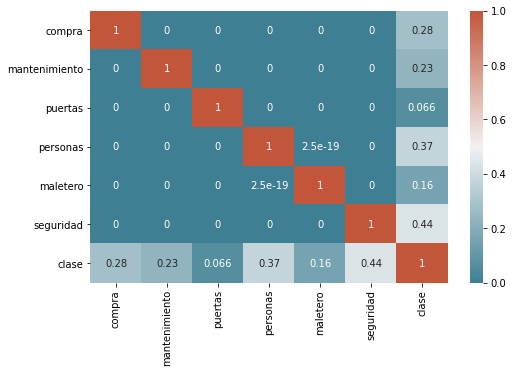

In [9]:
corr = car.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

Como podemos apreciar en la matrix de confusion se tiene que todas las entradas tienen correlacion con la salida por la que no se debe descartar ninguna, hay que tener en cuenta que para clasificacion se descarta las columnas que tienen mas correlacion, pero en este ejercicio se tomara el dataset completo.

A continuacion se partira el dataset en 30% datos para validacion y 70% para datos de entrenamiento.

In [18]:
X=car.iloc[:,0:6]
Y=car.iloc[:,6]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

##Clasificacion con Naive bayes

El primer metodo de clasificacion a usar es el metodo de naive bayes, Estos modelos son llamados algoritmos “Naive”, o “Inocentes” en español. En ellos se asume que las variables predictoras son independientes entre sí. En otras palabras, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica. [1]

Para ello creamos el modelo de clasificacion con GaussianNB de sklearn y se realiza el entrenamiento correspondiente.

In [46]:
from sklearn.naive_bayes import GaussianNB
modeloClasificador = GaussianNB(var_smoothing=5e-5)
modeloClasificador.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=5e-05)

Accuracy: 0.82
              precision    recall  f1-score   support

         acc       0.68      0.57      0.62       272
        good       0.47      0.17      0.25        52
       unacc       0.91      0.93      0.92       840
       vgood       0.44      1.00      0.61        45

    accuracy                           0.82      1209
   macro avg       0.62      0.67      0.60      1209
weighted avg       0.82      0.82      0.81      1209



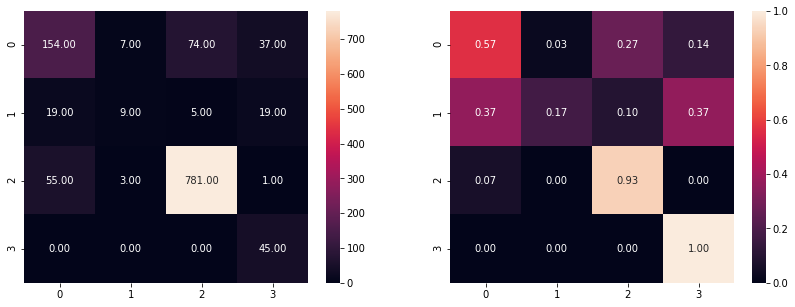

In [47]:
from sklearn.metrics import classification_report
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_predT = modeloClasificador.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_predT))
sns.heatmap(confusion_matrix(y_train, y_predT), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_train, y_predT, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_train, y_predT))

Se puede observar que con este metodo se obtuvo un accuracy de 82% para datos de entrenamiento, esto debido al parametro var_smoothing el cual se subio a 5e-5 ya que sin este parametro el accuracy solo era del 75%. este parametro es la porción de la variación más grande de todas las características que se agrega a las variaciones para la estabilidad del cálculo.

A continuacion se realiza la grafica ROC para los datos de entrenamiento con naive bayes, para ello primero se debe codificar las clases de la salida de entrenamiento y la salida del modelo entrenado en one hot, para asi hacer una comparacion entre estas dos.

In [37]:
from sklearn.preprocessing import label_binarize
y_score= y_predT.reshape(1209,1)
yTB = label_binarize(y_train, classes=["unacc", "acc", "good","vgood"])
ySB =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])


A continuacion se realiza el algoritmo para definir y graficar la ROC de cada entrada del modelo.

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yTB[:,i], ySB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yTB.ravel(), ySB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # Remove the CWD from sys.path while we load stuff.


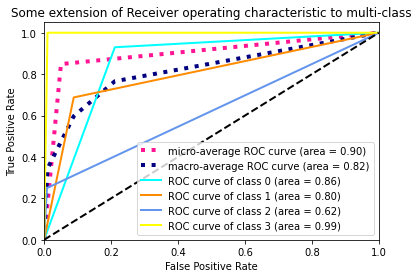

In [39]:
from scipy import interp
from itertools import cycle
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

lw=2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Antes de analizar el resultado cabe aclarar como funciona la curva ROC, esta curva presenta una comparacion entre los los datos de la salida esperados con los datos de salida del modelo, donde se puede analizar cada una de las clases de salida y su precision.

Para ello la curva ROC presenta una funcion de comparacion entre los verdaderos positivos en el eje Y y los falsos positivos en el eje x

Con esto podemos analizar los resultados de la clasificacion para entrenamiento con naive bayes donde podemos ver que para la clase 0 y la clase 3 se tiene un buen porcentaje de precision mientras que la clase 2 es la que mas falsos positivos tiene y la grafica tiende a quedarse mas cerca del eje x.

VALIDACION

Ahora realizamos el mismo modelo pero con datos de validacion.


Accuracy: 0.83
              precision    recall  f1-score   support

         acc       0.67      0.59      0.63       112
        good       0.38      0.29      0.33        17
       unacc       0.90      0.92      0.91       370
       vgood       0.69      1.00      0.82        20

    accuracy                           0.83       519
   macro avg       0.66      0.70      0.67       519
weighted avg       0.83      0.83      0.83       519



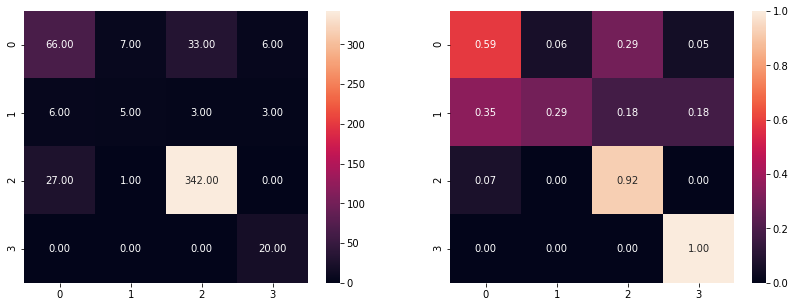

In [48]:
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
y_predV = modeloClasificador.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_predV))
sns.heatmap(confusion_matrix(y_test, y_predV), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_test, y_predV, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_test, y_predV))

Podemos observar que tiene un accuracy del 83%

ROC Validacion

In [49]:
y_scoreV= y_predV.reshape(519,1)
yTBV = label_binarize(y_train, classes=["unacc", "acc", "good","vgood"])
ySBV =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


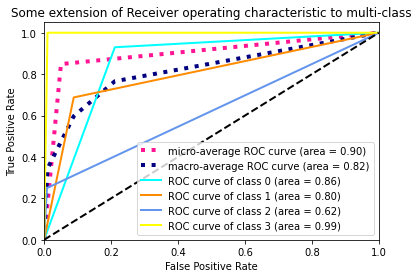

In [50]:
from scipy import interp
from itertools import cycle

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yTBV[:,i], ySBV[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yTBV.ravel(), ySBV.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()














En la roc de validacion podemos apreciar que tiene un comportamiento similar al de los datos de entrenamiento con una buena clasificacion para la clase 3 con 99% de datos bien clasificados pero con mala clasificacion en los datos de la clase 2 con un 62%

##Clasificacion por Regresion logistica

El segundo metoso de clasificación a usar es el metodo de Regresion logistica para ello se estipula un maximo de 2000 iteraciones

In [57]:
from sklearn.linear_model import LogisticRegression
# Create the classifier
clf_log = LogisticRegression(max_iter=2000,random_state=10)
# Train the classifier
clf_log.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.86
              precision    recall  f1-score   support

         acc       0.71      0.69      0.70       272
        good       0.66      0.48      0.56        52
       unacc       0.91      0.94      0.92       840
       vgood       0.88      0.80      0.84        45

    accuracy                           0.86      1209
   macro avg       0.79      0.73      0.75      1209
weighted avg       0.85      0.86      0.85      1209



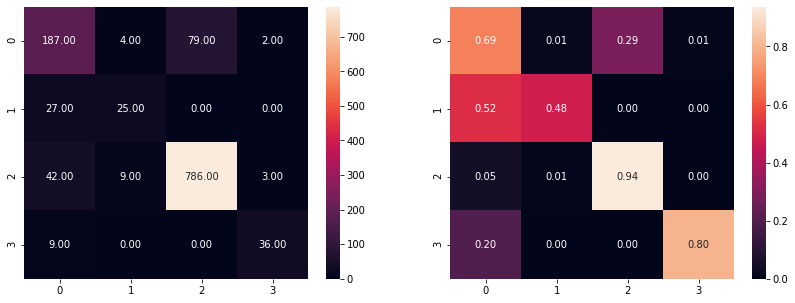

In [58]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred_logT = clf_log.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred_logT))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(y_train, y_pred_logT), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_train, y_pred_logT, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_train, y_pred_logT))

Para los datos de entrenamiento se obtuvo un accuracy de 86% con este metodo, ahora verificamos los resultados con la curva ROC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


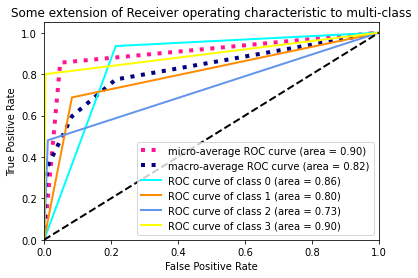

In [59]:




y_score= y_pred_logT.reshape(1209,1)
yLTB = label_binarize(y_train, classes=["unacc", "acc", "good","vgood"])
yLSB =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yLTB[:,i], yLSB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yLTB.ravel(), yLSB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()






Como podemos ver en este metodo no se obtuvo una clase con un buen indice de verdaderos positivos como con naive bayes, pero al contrario de ese metodo tampoco hubo una clase con muy malos resultados, a pesar de que esta presenta unos indices mas bajos, esta esta mas balanceada en cuanto a la clasificacion de cada clase, variando entre un 73% de datos buenos en la clase con peor clasificacion hasta un 90% en la clase con mejor clasificacion.

*VALIDACION*

Comprobamos este metodo para los datos de validacion

Accuracy: 0.85
              precision    recall  f1-score   support

         acc       0.70      0.62      0.66       112
        good       0.50      0.53      0.51        17
       unacc       0.90      0.95      0.92       370
       vgood       0.86      0.60      0.71        20

    accuracy                           0.85       519
   macro avg       0.74      0.68      0.70       519
weighted avg       0.85      0.85      0.85       519



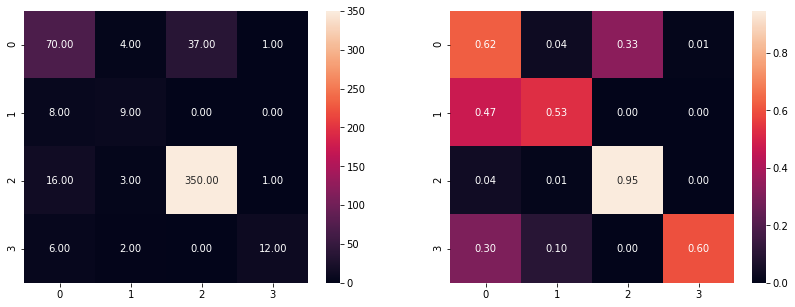

In [60]:







y_pred_logV = clf_log.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_logV))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(y_test, y_pred_logV), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_test, y_pred_logV, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_test, y_pred_logV))







Se obtuvo un accuracy del 85% para los datos de validacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


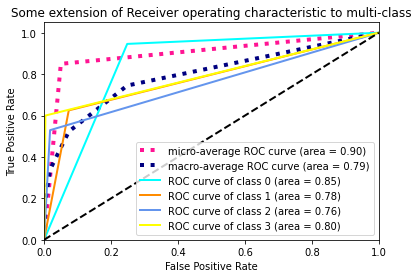

In [61]:
y_score= y_pred_logV.reshape(519,1)
yLTBV = label_binarize(y_test, classes=["unacc", "acc", "good","vgood"])
yLSBV =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yLTBV[:,i], yLSBV[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yLTBV.ravel(), yLSBV.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En cuanto a la curva ROC para datos de validacion se obtienen resultados bastantes parecidos a los datos de entrenamiento pero esta vez la clase con mayor ratio de verdaderos posiyivos es la clase 0 con 85% por lo que sigue siendo un modelo con poca precision para este conjunto de datos.

##Clasificacion por Maquinas de soporte vectorial

Por ultimo tenemos la clasificacion por maquinas de soporte vectorial este es un algoritmo mas robusto de clasificacion, para este se propone un maximo de iteraciones de 2000

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf_svm = Pipeline([
        ("scaler", MinMaxScaler()),
        ("svc", SVC(C=1, random_state=42,max_iter=2000)),])
clf_svm.fit(X_train, y_train.ravel())

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=2000,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

entrenamiento

Accuracy: 0.98
              precision    recall  f1-score   support

         acc       0.93      0.97      0.95       272
        good       0.98      0.98      0.98        52
       unacc       0.99      0.98      0.99       840
       vgood       0.98      0.91      0.94        45

    accuracy                           0.98      1209
   macro avg       0.97      0.96      0.96      1209
weighted avg       0.98      0.98      0.98      1209



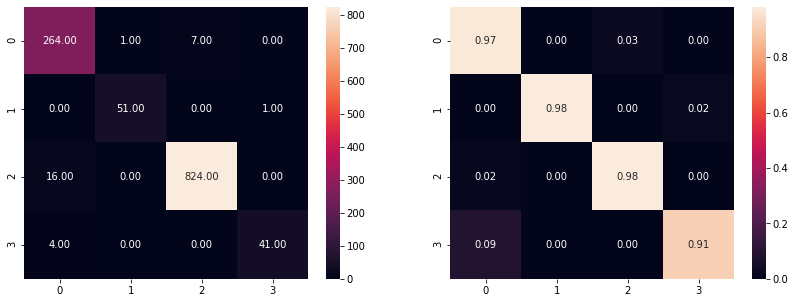

In [63]:








y_pred_svmT = clf_svm.predict(X_train)
print('Accuracy: %.2f' % accuracy_score(y_train, y_pred_svmT))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(y_train, y_pred_svmT), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_train, y_pred_svmT, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_train, y_pred_svmT))








Para los datos de entrenamiento este modelo logra un accuracy de 98% siendo el mejor metodo de clasificacion para este dataset hasta ahora con los mejores resultados.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


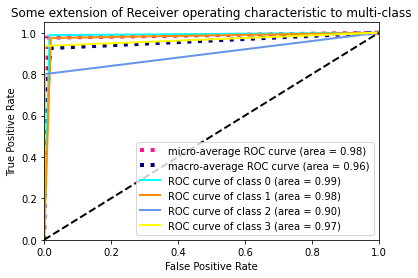

In [ ]:
y_score= y_pred_svmT.reshape(1209,1)
ySTB = label_binarize(y_train, classes=["unacc", "acc", "good","vgood"])
ySSB =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ySTB[:,i], ySSB[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ySTB.ravel(), ySSB.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

En la ROC para este metodo se puede observar que los resultados son muy buenos donde las clases 0,1 y 3 estan cerca del 100% de los datos verdaderos positivos y donde la clase 2 tiene un 90% de los datos en verdaderos positivos, ademas vemos que las curvas estan casi por completo en el eje y, esto demuestra que este metodo presenta la mejor clasificacion posible para los datos de entrenamiento.

*VALIDACION*

Accuracy: 0.97
              precision    recall  f1-score   support

         acc       0.91      0.97      0.94       112
        good       0.84      0.94      0.89        17
       unacc       1.00      0.98      0.99       370
       vgood       1.00      0.90      0.95        20

    accuracy                           0.97       519
   macro avg       0.94      0.95      0.94       519
weighted avg       0.97      0.97      0.97       519



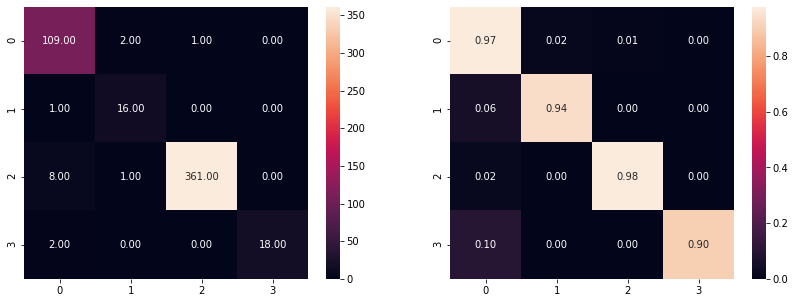

In [64]:
y_pred_svmV = clf_svm.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svmV))
fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)
sns.heatmap(confusion_matrix(y_test, y_pred_svmV), fmt=".2f", annot=True, ax=ax[0]);
sns.heatmap(confusion_matrix(y_test, y_pred_svmV, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
print(classification_report(y_test, y_pred_svmV))

Para validacion el accuracy es de 97% el cual tambien es bastante alto

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


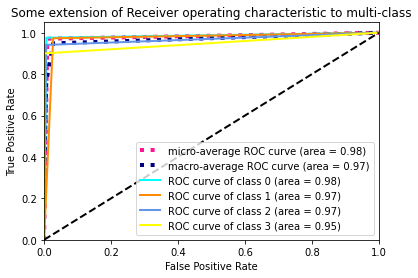

In [66]:
y_score= y_pred_svmV.reshape(519,1)
ySTBV = label_binarize(y_test, classes=["unacc", "acc", "good","vgood"])
ySSBV =label_binarize(y_score, classes=["unacc", "acc", "good","vgood"])

n_classes=4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ySTBV[:,i], ySSBV[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ySTBV.ravel(), ySSBV.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()







Podemos ver que para los datos de validacion este metodo alcanza los mejores resultados ya que todas las clases estan clasificando verdaderos positivos por encima del 95%, ademas de obtener la mejor grafica ROC de todas las realizadas en el miniproyecto.

***CONCLUSIONES***

* Para este dataset se tiene que el mejor metodo de clasificacion es las maquinas de soporte vectorial ya que dan un accuracy de mas del 97% ademas de que se puede evidenciar un buen comportamiento en las curvas ROC para cada clase comparado con los otros modelos de clasificacion.

* Es importante variar los parametros de los modelos de clasificacion ya que de estos tambien depende que tan buena sea la clasificacion de los datos.

* En una actividad real si se quiere presentar este modelo a una empresa cabe resaltar que debe mejorarse ya que hay factores como la seguridad del vehiculo que tiene alta correlacion con la clase de vehiculo, por lo que si una marca de autos desea diseñar vehiculos basado en estos datos debe tener un mkodelo creible y que presente resultados con el menor error posible, en este caso se presentaria el modelo de prediccion por maquinas de soporte vectorial.

***REFERENCIAS***
[1]Roman. V. "Algoritmos naive bayes:Fundamentos e implementacion". 2019, en linea. Disponible en: https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

[2]Sin nombre. "naive bayes teoria". en linea. Disponible en: https://aprendeia.com/naive-bayes-teoria-machine-learning/


[3]sin nombre. "naive bayes". en linea. disponible en: https://scikit-learn.org/stable/modules/naive_bayes.html

[4]Dataset car evaluation disponible en: https://archive.ics.uci.edu/ml/datasets/car+evaluation

[5]Sin nombre. "Característica de funcionamiento del receptor (ROC)". en linea. Disponible en: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html